## OIQ Exam Question 2

Question from OIQ Technical Exam, obviously meant to be solved using moment distribution, but
here we see how easy it is using slope deflection instead.  This version users a newer version of 'sdutil'
that computes end-shears as well as moments.

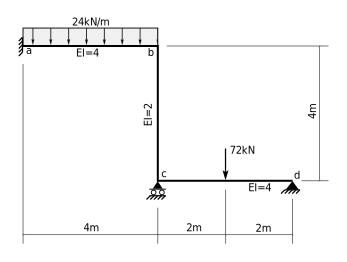

In [1]:
from IPython import display
display.SVG('oiq-frame-1.svg')

### Solution 1
Actually, solution 1 does not use any special library modules at all (except for 'sympy').

In [2]:
from sympy import *

In [3]:
var('EI ta tb tc td')
Mab = (EI/4)*(4*ta + 2*tb) - 24*4**2/12
Mba = (EI/4)*(2*ta + 4*tb) + 24*4**2/12
Mbc = (EI/2/4)*(4*tb + 2*tc)
Mcb = (EI/2/4)*(2*tb + 4*tc)
Mcd = (EI/4)*(4*tc + 2*td) - 72*4/8
Mdc = (EI/4)*(2*tc + 4*td) + 72*4/8

In [4]:
eqns = [ta, Mba+Mbc, Mcb+Mcd, Mdc]
soln = solve( eqns, [ta, tb, tc, td] )
soln

{td: -60.551724137931/EI,
 ta: 0.0,
 tb: -29.5172413793103/EI,
 tc: 49.1034482758621/EI}

In [5]:
[m.subs(soln).n(4) for m in [Mab,Mba,Mbc,Mcb,Mcd,Mdc]]

[-46.76, 2.483, -2.483, 17.17, -17.17, 0]

In [6]:
Rd = (Mcd + 72*2)/4
Ra = (-(Mab + Mba) + 24*4*2)/4
Rc = 24*4 + 72 - Ra - Rd
Hd = (Mbc + 72*2 - Rd*4)/4
[r.subs(soln).n(4) for r in [Ra,Rc,Rd,Hd]]

[59.07, 77.22, 31.71, 3.672]

### Solution 2
Here it is again, using the SD utilities:

In [7]:
from sympy import *
init_printing(use_latex='mathjax')
from sdutil2 import SD,FEF

In [8]:
var('EI theta_a theta_b theta_c theta_d')
M_ab, M_ba, V_ab, V_ba = SD(4,EI,theta_a,theta_b) + FEF.udl(4,24)
M_bc, M_cb, V_bc, V_cb = SD(4,EI/2,theta_b,theta_c)
M_cd, M_dc, V_cd, V_dc = SD(4,EI,theta_c,theta_d) + FEF.p(4,72,2)

In [9]:
eqns = [theta_a, M_ba+M_bc, M_cb+M_cd, M_dc]
soln = solve( eqns, [theta_a, theta_b, theta_c, theta_d] )
soln

⎧              -29.5172413793103        49.1034482758621       -60.55172413793
⎨θₐ: 0.0, θ_b: ──────────────────, θ_c: ────────────────, θ_d: ───────────────
⎩                      EI                      EI                      EI     

1 ⎫
──⎬
  ⎭

End moments and shears:

In [10]:
[m.subs(soln).n(4) for m in [M_ab,M_ba,M_bc,M_cb,M_cd,M_dc]]

[-46.76, 2.483, -2.483, 17.17, -17.17, 0]

In [11]:
[m.subs(soln).n(4) for m in [V_ab,V_ba,V_bc,V_cb,V_cd,V_dc]]

[59.07, -36.93, -3.672, -3.672, 40.29, -31.71]

Reactions:

In [12]:
R_d = -V_dc
R_c = V_cd - V_ba
R_a = V_ab
H_d = -V_cb
H_a = V_cb
M_a = M_ab
[r.subs(soln).n(4) for r in [R_a,R_c,R_d,H_d,H_a,M_a]]

[59.07, 77.22, 31.71, 3.672, -3.672, -46.76]

#### Equilibrium check

In [13]:
## sum vertical forces
(R_a + R_c + R_d - 24*4 - 72).subs(soln)

0

In [14]:
## sum horizontal forces
(H_a+H_d).subs(soln)

0

In [15]:
## sum moments about a
(M_a + 24*4*2 - R_c*4 + 72*6 - R_d*8 - H_d*4).subs(soln)

0